In [1]:
#loading data-set
from scipy.io import arff
file_path ='datasets/mnist_784.arff'
data,meta = arff.loadarff(file_path)

In [2]:
#converting arff to a pandas dataframe
import numpy as np
import pandas as pd

mnist_df = pd.DataFrame(data)
mnist_df.shape

(70000, 785)

In [3]:
#splitting dataframe to target 
mnist_target_df = mnist_df.iloc[:,-1]
mnist_target_df

0        b'5'
1        b'0'
2        b'4'
3        b'1'
4        b'9'
         ... 
69995    b'2'
69996    b'3'
69997    b'4'
69998    b'5'
69999    b'6'
Name: class, Length: 70000, dtype: object

In [4]:
#splitting dataframe to pixels 
mnist_pixels_df = mnist_df.iloc[:,:-1]
mnist_pixels_df

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
print(mnist_pixels_df.shape)
print(mnist_target_df)

(70000, 784)
0        b'5'
1        b'0'
2        b'4'
3        b'1'
4        b'9'
         ... 
69995    b'2'
69996    b'3'
69997    b'4'
69998    b'5'
69999    b'6'
Name: class, Length: 70000, dtype: object


In [6]:
#1D and 2D NumPy arrays
X = mnist_pixels_df.values
y = np.array([float(item.decode('utf-8'))for item in mnist_target_df])

In [7]:
#Importing functions to plot the numbers
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt


In [54]:
#Picking a random number for plotting
number_five= 0
some_digit = X[number_five]
#reshaping the number to a 28x28 grid
some_digit_image = some_digit.reshape(28,28)

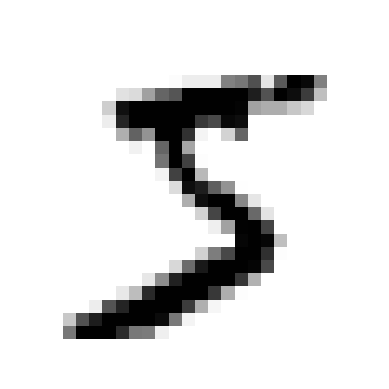

In [55]:
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, 
           interpolation="nearest")
plt.axis("off")
plt.show()

In [56]:
target_digit = y[number_five]
target_digit

5.0

In [57]:
#separando o conjunto de treino e de teste
X_train, X_test, y_train, y_test = X[:60000],X[60000:], y[:60000], y[60000:]

In [58]:
#embaralhando o conjunto de treinamento para validação cruzada
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [59]:
#Classificador binário
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [60]:
#SGD do scikit-learn
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [61]:
sgd_clf.predict([some_digit])

array([ True])

In [62]:
#Medindo acurácia com validação cruzada
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    #clonando o classificador a cada iteração 
    clone_clf = clone(sgd_clf)

    #Separando 40000 e 20000 instancias estratificadas para treinamento e teste respect.
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    #ajustando o conjunto de treinamento ao clone atual do classificador
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)

    #quantidade total de acertos é calculada para todo o conjunto de predição e o conjunto alvo
    n_correct = sum(y_pred == y_test_fold)

    #total de acertos sobre total de predições
    print(n_correct / len(y_pred)) 



0.9625
0.9702
0.9627


In [63]:
#utilizando score de validação cruzada para medir o desempenho para 3-folds
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")
#acurácia geralmente não é um bom medidor de desempenho para classificadores

array([0.96  , 0.9586, 0.9604])

In [64]:
#medindo desempenho com Matriz de confusão
from sklearn.model_selection import cross_val_predict

#separando conjunto de previsão para comparar com os alvos reais 
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
y_train_pred.dtype

dtype('bool')

In [65]:
#utilizando os conjuntos de previsão aplicados na matriz de confusão
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)
#a diagonal principal expressa os valores corretamente classificados
#primeira linha (não 5)
#segunda linha (imagem 5)

array([[53001,  1578],
       [  842,  4579]], dtype=int64)

In [66]:
#métrica de precisão e revocação da matriz de confusão:
from sklearn.metrics import precision_score, recall_score

print("precision: ", precision_score(y_train_5, y_train_pred), "recall: ", recall_score(y_train_5, y_train_pred))



precision:  0.7437063504953711 recall:  0.8446781036709095


In [67]:
#pontuiação F1 é a média harmônica da precisão e da revocação com peso muito maior aos valores mais baixos
#apenas obtém melhor pontuação caso a precisão e revocação sejam altas

from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7909828986007947

In [78]:
#utilizando o método decision_function() para obter pontuações
#escolhendo um limiar
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([5995.53715059])

In [79]:
#Determinando um limiar diferente (SGDClassifier tem por padrão limiar 0)
threshold = 200000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred
#ao aumentar o limiar a revocação diminuirá

array([False])

In [80]:
#Utilizando o cross_val_predict para escolher o melhor limiar
#Dessa vez utilizar o metodo de função de decisão para obter a pontuação de todas as instâncias
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

In [81]:
#Pontuação obtida a partir da função de decisão
y_scores

array([ -2788.26993611,    235.32119426, -13909.40927851, ...,
       -11919.56571006, -17277.52203445,  -6765.5735683 ])

In [82]:
#utilizando curva de precisão e revocação para calcular todos os limiares possíveis
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

<function matplotlib.pyplot.show(close=None, block=None)>

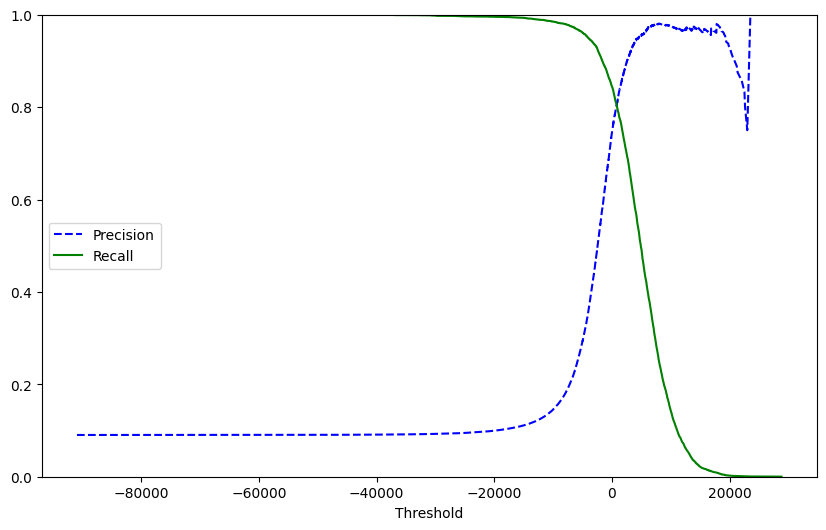

In [83]:
#precisão e revocação como funções de valor do limiar
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(10, 6))
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="center left")
    plt.ylim([0, 1])
       

plot_precision_recall_vs_threshold(precisions,recalls,thresholds)
plt.show

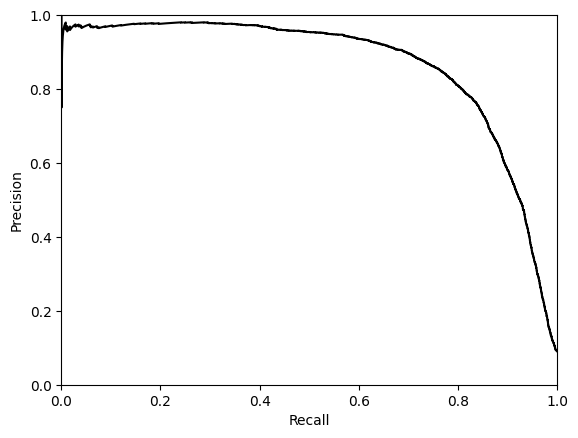

In [84]:
#Visualização da Precisão versus Revocação
def plot_precision_versus_recall(precisions, recalls):
    plt.plot(recalls, precisions, "k-")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.ylim([0, 1])
    plt.xlim([0, 1])

plot_precision_versus_recall(precisions,recalls)

In [118]:
#Escolhendo compensação de precisão/revocação antes da queda acentuada
#almejando 90% de precisão
y_train_pred_90 = (y_scores> 2550)

In [119]:
#score de precisão próximo a 90%
precision_score(y_train_5, y_train_pred_90)

0.899356069639876

In [120]:
#score de revocação próximo de 70%
recall_score(y_train_5, y_train_pred_90)

0.6956281128942999

In [121]:
#RECEPTOR OPERATIONAL CHARACTERISTICS CURVE (curva ROC)
from sklearn.metrics import roc_curve
#A curva ROC é uma relação de sensibilidade (revocação/TPR) versus 1 - especificidade ou TNR (FPR)  
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)


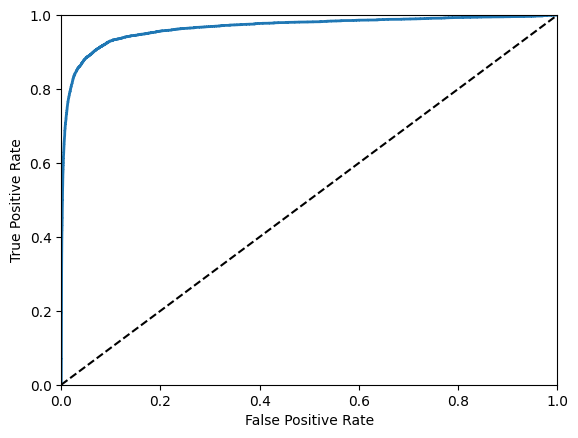

In [122]:
#Plotando a curva

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

plot_roc_curve(fpr, tpr, "ROC CURVE")
plt.show()

In [124]:
#Calculando área abaixo da curva (ROC AUC)
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9663026835126785

In [126]:
#Random Forest Classifier para realizar comparação da curva ROC do SGD classifier
#Classificadores podem ter os métodos decision_function() ou predict_proba()
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                      method="predict_proba")


In [136]:
#Classificador binário (probabilidade de ser 5 ou não)
y_probas_forest

array([[0.98, 0.02],
       [0.57, 0.43],
       [0.98, 0.02],
       ...,
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.98, 0.02]])

In [137]:
#Obtendo scores por meio das probabilidades positivas
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

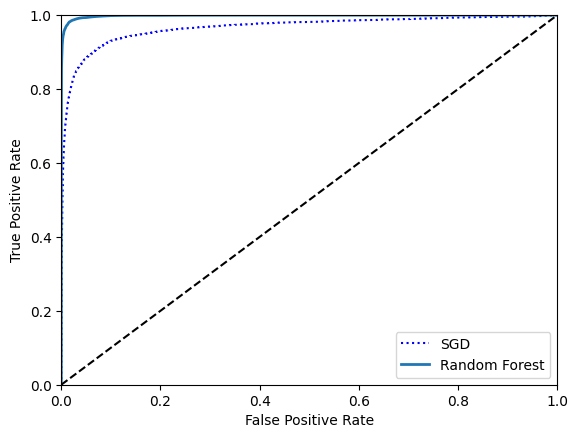

In [140]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest") 
plt.legend(loc="lower right")
plt.show()

In [141]:
#Pontuação ROC AUC do Random Forest Classifier
roc_auc_score(y_train_5, y_scores_forest)

0.998558349874988

In [148]:
y_train_pred = cross_val_predict(forest_clf, X_train, y_train_5,cv=3)

In [149]:
#Pontuação da precisão e revocação do Random Forest Classifier
print("precision: ", precision_score(y_train_5, y_train_pred), "recall: ", recall_score(y_train_5, y_train_pred))

precision:  0.9905818334030976 recall:  0.8730861464674414
